In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import json

In [21]:
with open('2ndnovember_shift_1215.json') as f:
    employees = json.loads(f.read())

with open('dist_matrix.json') as f:
    distance_matrix = json.loads(f.read())

    cab_types = ['INDICA', 'SUMO', 'TRAVELLER']
price = [15, 15, 20]
with open('home_to_office.json') as f:
    home_to_office_dist = json.loads(f.read())
employee_count = len(employees)

In [9]:
def get_seat(cab):
    if cab is 'INDICA':
        return 4
    elif cab is 'SUMO':
        return 6
    else:
        return 12

In [10]:
def get_cab(n):
    if n <=4:
        return 'INDICA'
    elif n <=6:
        return 'SUMO'
    else:
        return 'TRAVELLER'

In [11]:
def cab_occupancy(poools):
    # pool_count_with_types
    empcnt = 0 
    pool_cnts = {}
    for pool in poools:
        if len(pool) not in pool_cnts:
            pool_cnts[len(pool)] = 0
        pool_cnts[len(pool)] += 1
    ret = [0, 0, 0]
    for k,val in pool_cnts.items():
        print("{}           => {}".format(str(k), str(val)))
        if k <=4:
            ret[0] += k * val
        elif k<=6:
            ret[1] += k*val
        else:
            ret[2] += k*val
    return ret

In [23]:
def cab_occupancy(poools):
    # pool_count_with_types
    empcnt = 0 
    pool_cnts = {}
    for pool in poools:
        if len(pool) not in pool_cnts:
            pool_cnts[len(pool)] = 0
        pool_cnts[len(pool)] += 1
    ret = [0, 0, 0]
    for k,val in pool_cnts.items():
        print("{}           => {}".format(str(k), str(val)))
        if k <=4:
            ret[0] += k * val
        elif k<=6:
            ret[1] += k*val
        else:
            ret[2] += k*val
    return ret
def droute_dist(pool, employee_dists, employee_droute, employee_cabs):
    rev = pool[::-1]
    cur = rev[0]
    idd = employees.index(cur)
    total_dist = home_to_office_dist[idd]
    employee_dists[idd] = total_dist
    employee_droute[idd] = 1
    droutes = [1]
    cab = get_cab(len(pool))
    employee_cabs[idd] = cab
    for pick in rev[1:]:
        idx = employees.index(cur)
        p = employees.index(pick)
        dis = distance_matrix[p][idx]
        total_dist += dis
        x = home_to_office_dist[p]
        droute = (total_dist * 1.0) / x  
        cur = pick
        employee_dists[p] = total_dist
        employee_droute[p] = droute
        employee_cabs[p] = cab
        droutes.append(droute)
    return max(droutes), total_dist

In [19]:
with open('results.json') as f:
    our_result = json.loads(f.read())
our_pools = [list(map(lambda i: employees[i], pool)) for pool in our_result]

In [24]:
## our pool Count
our_count = len(our_pools)
our_cabs = list(map(lambda pool: get_cab(len(pool)), our_pools))
our_cab_count = [our_cabs.count('INDICA'), our_cabs.count('SUMO'), our_cabs.count('TRAVELLER')]

our_cab_wise_droutes = [[], [], []]
our_cab_wise_dists = [0, 0, 0]
our_employee_wise_droute = [0]*employee_count
our_employee_wise_dists = [0]*employee_count
our_employee_wise_cabs = ['']*employee_count
for pool in our_pools:
    droute, total_dist = droute_dist(pool, our_employee_wise_dists, our_employee_wise_droute, our_employee_wise_cabs)
    if len(pool) <= 4:
        i = 0
    elif len(pool) <= 6:
        i = 1
    else:
        i = 2
    our_cab_wise_droutes[i].append(droute)
    our_cab_wise_dists[i] += total_dist

In [25]:
their_pools = []
prev = employees[0]
cur = [prev]
for emp in employees[1:]:
    if prev['serial_no'] >= emp['serial_no']:
        their_pools.append(cur)
        prev = emp 
        cur = [emp]
    else:
        cur.append(emp)

if cur:
    their_pools.append(cur)

In [26]:
their_count = len(their_pools)
their_cabs = list(map(lambda pool: get_cab(len(pool)), their_pools))
their_cab_count = [their_cabs.count('INDICA'), their_cabs.count('SUMO'), their_cabs.count('TRAVELLER')]


their_cab_wise_droutes = [[], [], []]
their_cab_wise_dists = [0, 0, 0]
their_employee_wise_droute = [0]*employee_count
their_employee_wise_dists = [0]*employee_count
their_employee_wise_cabs = ['']*employee_count
for pool in their_pools:
    droute, total_dist = droute_dist(pool, their_employee_wise_dists, their_employee_wise_droute, their_employee_wise_cabs)
    if len(pool) <= 4:
        i = 0
    elif len(pool) <= 6:
        i = 1
    else:
        i = 2
    their_cab_wise_droutes[i].append(droute)
    their_cab_wise_dists[i] += total_dist

In [27]:
their_stats = {}
our_stats = {}

In [28]:
their_stats['cab_count'] = {}
for tp, cnt in zip(cab_types, their_cab_count):
    their_stats['cab_count'][tp] = cnt
    print('{} :{}'.format(tp, cnt))

INDICA :34
SUMO :14
TRAVELLER :18


In [29]:
our_stats['cab_count'] = {}
for tp, cnt in zip(cab_types, our_cab_count):
    our_stats['cab_count'][tp] = cnt
    print('{} :{}'.format(tp, cnt))

INDICA :4
SUMO :6
TRAVELLER :28


In [30]:
print("~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
their_stats['cab_wise_distance'] = {}
for tp, dist in zip(cab_types, their_cab_wise_dists):
    print('{} :{}'.format(tp, dist/1000.0))
    their_stats['cab_wise_distance'][tp] = dist/1000.0

~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :872.29868
SUMO :455.906
TRAVELLER :643.1962000000001


In [31]:
print("~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~")
our_stats['cab_wise_distance'] = {}
for tp, dist in zip(cab_types, our_cab_wise_dists):
    print('{} :{}'.format(tp, dist/1000.0))
    our_stats['cab_wise_distance'][tp] = dist/1000.0

~~~~~~~~~~~~~~~~~~TOTAL DISTANCE COVERED BY DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :42.129
SUMO :136.302
TRAVELLER :840.1518400000001


In [32]:
their_stats['cab_wise_avg_distance'] = {}
for i in range(3):
    print('{} :{}'.format(cab_types[i], their_cab_wise_dists[i]/(1000.0*their_cab_count[i])))  
    their_stats['cab_wise_avg_distance'][cab_types[i]] = their_cab_wise_dists[i]/(1000.0*their_cab_count[i])

~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY A SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~
INDICA :25.65584352941176
SUMO :32.56471428571429
TRAVELLER :35.73312222222223


In [33]:
print("~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY A SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~")
our_stats['cab_wise_avg_distance'] = {}
for i in range(3):
    print('{} :{}'.format(cab_types[i], our_cab_wise_dists[i]/(1000.0*our_cab_count[i])))  
    our_stats['cab_wise_avg_distance'][cab_types[i]] = our_cab_wise_dists[i]/(1000.0*our_cab_count[i])

~~~~~~~~~~~~~~~~~~AVERAGE DISTANCE COVERED BY A SINGLE CAB OF DIFFERENT TYPES~~~~~~~~~~~~~~~~~
INDICA :10.53225
SUMO :22.717
TRAVELLER :30.00542285714286


In [34]:
print("~~~~~~~~~~~~~~~~~~TOTAL Price Paid For DIFFERENT CAB TYPES:THEIRS~~~~~~~~~~~~~~~~~")
their_stats['cab_type_price'] = {}
their_total_price = 0
for i in range(3):
    prc = price[i]*(their_cab_wise_dists[i]/1000.0)
    print('{} :{}'.format(cab_types[i],  prc))
    their_stats['cab_type_price'][cab_types[i]] = prc
    their_total_price += prc
their_stats['total_price'] = their_total_price
print('Their Total Price: :{}'.format(their_total_price))

~~~~~~~~~~~~~~~~~~TOTAL Price Paid For DIFFERENT CAB TYPES~~~~~~~~~~~~~~~~~
INDICA :13084.4802
SUMO :6838.59
TRAVELLER :12863.924000000003
Their Total Price: :32786.9942


In [35]:
print("~~~~~~~~~~~~~~~~~~TOTAL Price Paid For DIFFERENT CAB TYPES:OURS~~~~~~~~~~~~~~~~~")
our_total_price = 0
our_stats['cab_type_price'] = {}
for i in range(3):
    prc = price[i]*(our_cab_wise_dists[i]/1000.0)
    our_stats['cab_type_price'][cab_types[i]] = prc
    print('{} :{}'.format(cab_types[i],  prc))
    our_total_price += prc
our_stats['total_price'] = our_total_price
print('Our Total Price: :{}'.format(our_total_price))

~~~~~~~~~~~~~~~~~~TOTAL Price Paid For DIFFERENT CAB TYPES:OURS~~~~~~~~~~~~~~~~~
INDICA :631.935
SUMO :2044.53
TRAVELLER :16803.0368
Our Total Price: :19479.501800000002


In [36]:
price_efficiency = their_total_price / our_total_price - 1
print("Price Efficiency: {}".format(price_efficiency))

Price Efficiency: 0.6831536317833342


In [37]:
print("~~~~~~~~~~~~~~~~~~Cab wise average droutes:Theirs ~~~~~~~~~~~~~~~~~")
their_stats['cab_wise_avg_droutes'] = {}
for typ, droutes in zip(cab_types, their_cab_wise_droutes):
    print("{}:     {}".format(typ, sum(droutes)/len(droutes)))
    their_stats['cab_wise_avg_droutes'][typ] = sum(droutes)/len(droutes)

~~~~~~~~~~~~~~~~~~Cab wise average droutes:Theirs ~~~~~~~~~~~~~~~~~
INDICA:     1.3754080727344047
SUMO:     1.7617034285420645
TRAVELLER:     2.0550577412250264


In [39]:
print("~~~~~~~~~~~~~~~~~~Cab wise average droutes: ~~~~~~~~~~~~~~~~~")
our_stats['cab_wise_avg_droutes'] = {}
for typ, droutes in zip(cab_types, our_cab_wise_droutes):
    print("{}:     {}".format(typ, sum(droutes)/len(droutes)))
    our_stats['cab_wise_avg_droutes'][typ] = sum(droutes)/len(droutes)

~~~~~~~~~~~~~~~~~~Cab wise average droutes: ~~~~~~~~~~~~~~~~~
INDICA:     1.0062503668055638
SUMO:     1.1390297035202581
TRAVELLER:     1.2348321025309297


Cab Type: INDICA


<Container object of 34 artists>

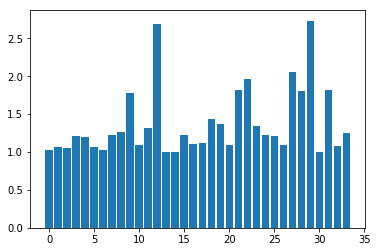

In [40]:
print("Cab Type: INDICA")
plt.bar(range(len(their_cab_wise_droutes[0])), their_cab_wise_droutes[0])

Cab Type: SUMO


<Container object of 14 artists>

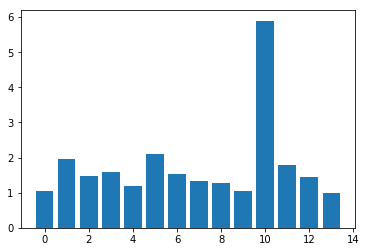

In [41]:
print("Cab Type: SUMO")
plt.bar(range(len(their_cab_wise_droutes[1])), their_cab_wise_droutes[1])

In [43]:
print("Their pool size:     people count")
their_occupancy = cab_occupancy(their_pools)

Their pool size:     people count
2           => 5
4           => 17
7           => 9
3           => 9
5           => 9
6           => 5
8           => 6
9           => 2
1           => 3
10           => 1


In [46]:
print("Their Occupancy")
their_stats['occupancy'] = {}
their_stats['people_by_cab'] = {}
for i in range(3):
    their_stats['people_by_cab'][cab_types[i]] = their_occupancy[i]
    their_stats['occupancy'][cab_types[i]] = their_occupancy[i] / (get_seat(cab_types[i])*their_cab_count[i])
    print("CAB TYPE: {}       => {}".format(cab_types[i], their_occupancy[i] / (get_seat(cab_types[i])*their_cab_count[i])))

Their Occupancy
CAB TYPE: INDICA       => 0.7941176470588235
CAB TYPE: SUMO       => 0.8928571428571429
CAB TYPE: TRAVELLER       => 0.6435185185185185


Employee Wise droute:Ours-Red, Theirs-Blue


<Container object of 322 artists>

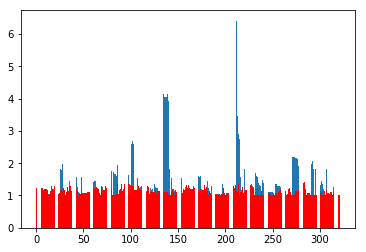

In [49]:
print("Employee Wise droute:Ours-Red, Theirs-Blue")
plt.bar(range(len(their_employee_wise_droute)), their_employee_wise_droute)
plt.bar(range(len(our_employee_wise_droute)), our_employee_wise_droute, color='red')

In [50]:
good = 0
for i in range(len(employees)):
    if their_employee_wise_droute[i] >= our_employee_wise_droute[i]:
        good +=1

Employee Wise Distance: Ours:Red, Theirs: Blue


<Container object of 322 artists>

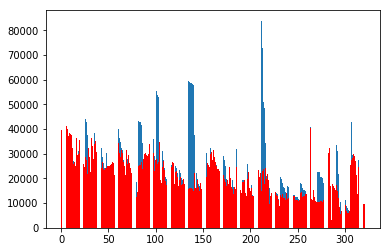

In [53]:
print("Employee Wise Distance: Ours:Red, Theirs: Blue")
plt.bar(range(len(their_employee_wise_dists)), their_employee_wise_dists)
plt.bar(range(len(our_employee_wise_dists)), our_employee_wise_dists, color='red')

In [54]:
json.dumps(their_stats)
json.dumps(our_stats)

'{"cab_count": {"INDICA": 4, "SUMO": 6, "TRAVELLER": 28}, "cab_wise_distance": {"INDICA": 42.129, "SUMO": 136.302, "TRAVELLER": 840.1518400000001}, "cab_wise_avg_distance": {"INDICA": 10.53225, "SUMO": 22.717, "TRAVELLER": 30.00542285714286}, "cab_type_price": {"INDICA": 631.935, "SUMO": 2044.53, "TRAVELLER": 16803.0368}, "total_price": 19479.501800000002, "cab_wise_avg_droutes": {"INDICA": 1.0062503668055638, "SUMO": 1.1390297035202581, "TRAVELLER": 1.2348321025309297}}'